In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")
sns.set_context("poster")
sns.set_palette("deep", n_colors=12)

In [10]:
df_results = pd.read_csv("./processed_csvs/extraction.csv")

In [11]:
def get_recall(x):
    x = eval(x)
    if len(x) == 0:
        return 1
    x = np.array(x)
    return np.sum(x) / len(x)


def get_precision(x):
    x = eval(x)
    if len(x) == 0:
        return 1
    x = np.array(x)
    return np.sum(x) / len(x)


df_results["recall"] = df_results["gt_correctness"].apply(get_recall)
df_results["precision"] = df_results["pred_correctness"].apply(get_precision)

df_results["f1_score"] = (
    2
    * (df_results["precision"] * df_results["recall"])
    / (df_results["precision"] + df_results["recall"])
)

In [12]:
DATASET_MAP = {
    "drug_extraction": "Drug Extraction",
    "medication_extraction": "Medication Extraction",
    "concept_treatment_extraction": "Concept Treatment Extraction",
    "concept_problem_extraction": "Concept Problem Extraction",
    "concept_test_extraction": "Concept Test Extraction",
    "risk_factor_cad_extraction": "Risk Factor CAD Extraction",
}

ORDER_MAP = {
    "Llama-2-7b-chat-hf": 2,
    "Llama-2-13b-chat": 1,
    "alpaca-7b": 3,
    "asclepius": 5,
    "clinical-camel-7b": 4,
    "medalpaca-7b": 6,
    "mistral-7b": 0,
}

MODEL_MAP = {
    "Llama-2-7b-chat-hf": "Llama-2 (7b)",
    "alpaca-7b": "Alpaca (7b)",
    "asclepius": "Asclepius (7b)",
    "clinical-camel-7b": "Clin-Camel (13b)",
    "medalpaca-7b": "MedAlpaca (7b)",
    "mistral-7b": "Mistral (7b)",
    "Llama-2-13b-chat": "Llama-2 (13b)",
}

colors = sns.color_palette("deep", 10, desat=0.8)
COLOR_MAP = {
    "Mistral (7b)": colors[7],
    "Llama-2 (7b)": colors[1],
    "Llama-2 (13b)": colors[0],
    "Alpaca (7b)": colors[3],
    "Asclepius (7b)": colors[1],
    "Clin-Camel (13b)": colors[0],
    "MedAlpaca (7b)": colors[3],
}

COLOR_MAP_LOWER = {
    "mistral-7b": colors[7],
    "Llama-2-7b-chat-hf": colors[1],
    "Llama-2-13b-chat": colors[0],
    "alpaca-7b": colors[3],
    "asclepius": colors[1],
    "clinical-camel-7b": colors[0],
    "medalpaca-7b": colors[3],
}

In [13]:
df_results = df_results[
    ["dataset", "model", "annotator", "precision", "recall", "f1_score"]
]
df_results_grouped = (
    df_results.groupby(["dataset", "model", "annotator"]).mean().reset_index()
)

df_results_grouped["y_labels"] = df_results_grouped["model"].apply(
    lambda x: MODEL_MAP[x]
)

df_results_grouped["order"] = df_results_grouped["model"].apply(lambda x: ORDER_MAP[x])
df_results_grouped = df_results_grouped.sort_values(by=["order"])

In [14]:
df_results_grouped

,dataset,model,annotator,precision,recall,f1_score,y_labels,order
251,concept_treatment_extraction,mistral-7b,Annotator_9,0.054365,0.534493,0.088848,Mistral (7b),0
164,concept_test_extraction,mistral-7b,Annotator_6,0.252016,0.325948,0.196810,Mistral (7b),0
165,concept_test_extraction,mistral-7b,Annotator_7,0.281534,0.306763,0.230234,Mistral (7b),0
166,concept_test_extraction,mistral-7b,Annotator_8,0.436548,0.332664,0.301261,Mistral (7b),0
167,concept_test_extraction,mistral-7b,Annotator_9,0.127491,0.388611,0.130714,Mistral (7b),0
...,...,...,...,...,...,...,...,...
155,concept_test_extraction,medalpaca-7b,Annotator_9,0.134487,0.218935,0.120260,MedAlpaca (7b),6
144,concept_test_extraction,medalpaca-7b,Annotator_1,0.055441,0.280326,0.056807,MedAlpaca (7b),6
145,concept_test_extraction,medalpaca-7b,Annotator_10,0.038251,0.276064,0.054811,MedAlpaca (7b),6
147,concept_test_extraction,medalpaca-7b,Annotator_12,0.176260,0.267380,0.141807,MedAlpaca (7b),6


In [15]:
datasets = [
    "medication_extraction",
    "concept_test_extraction",
    "concept_problem_extraction",
    "concept_treatment_extraction",
    "risk_factor_cad_extraction",
]
df_results_grouped = df_results_grouped[df_results_grouped["dataset"].isin(datasets)]
df_results_grouped.to_csv("./processed_csvs/extraction_grouped.csv")

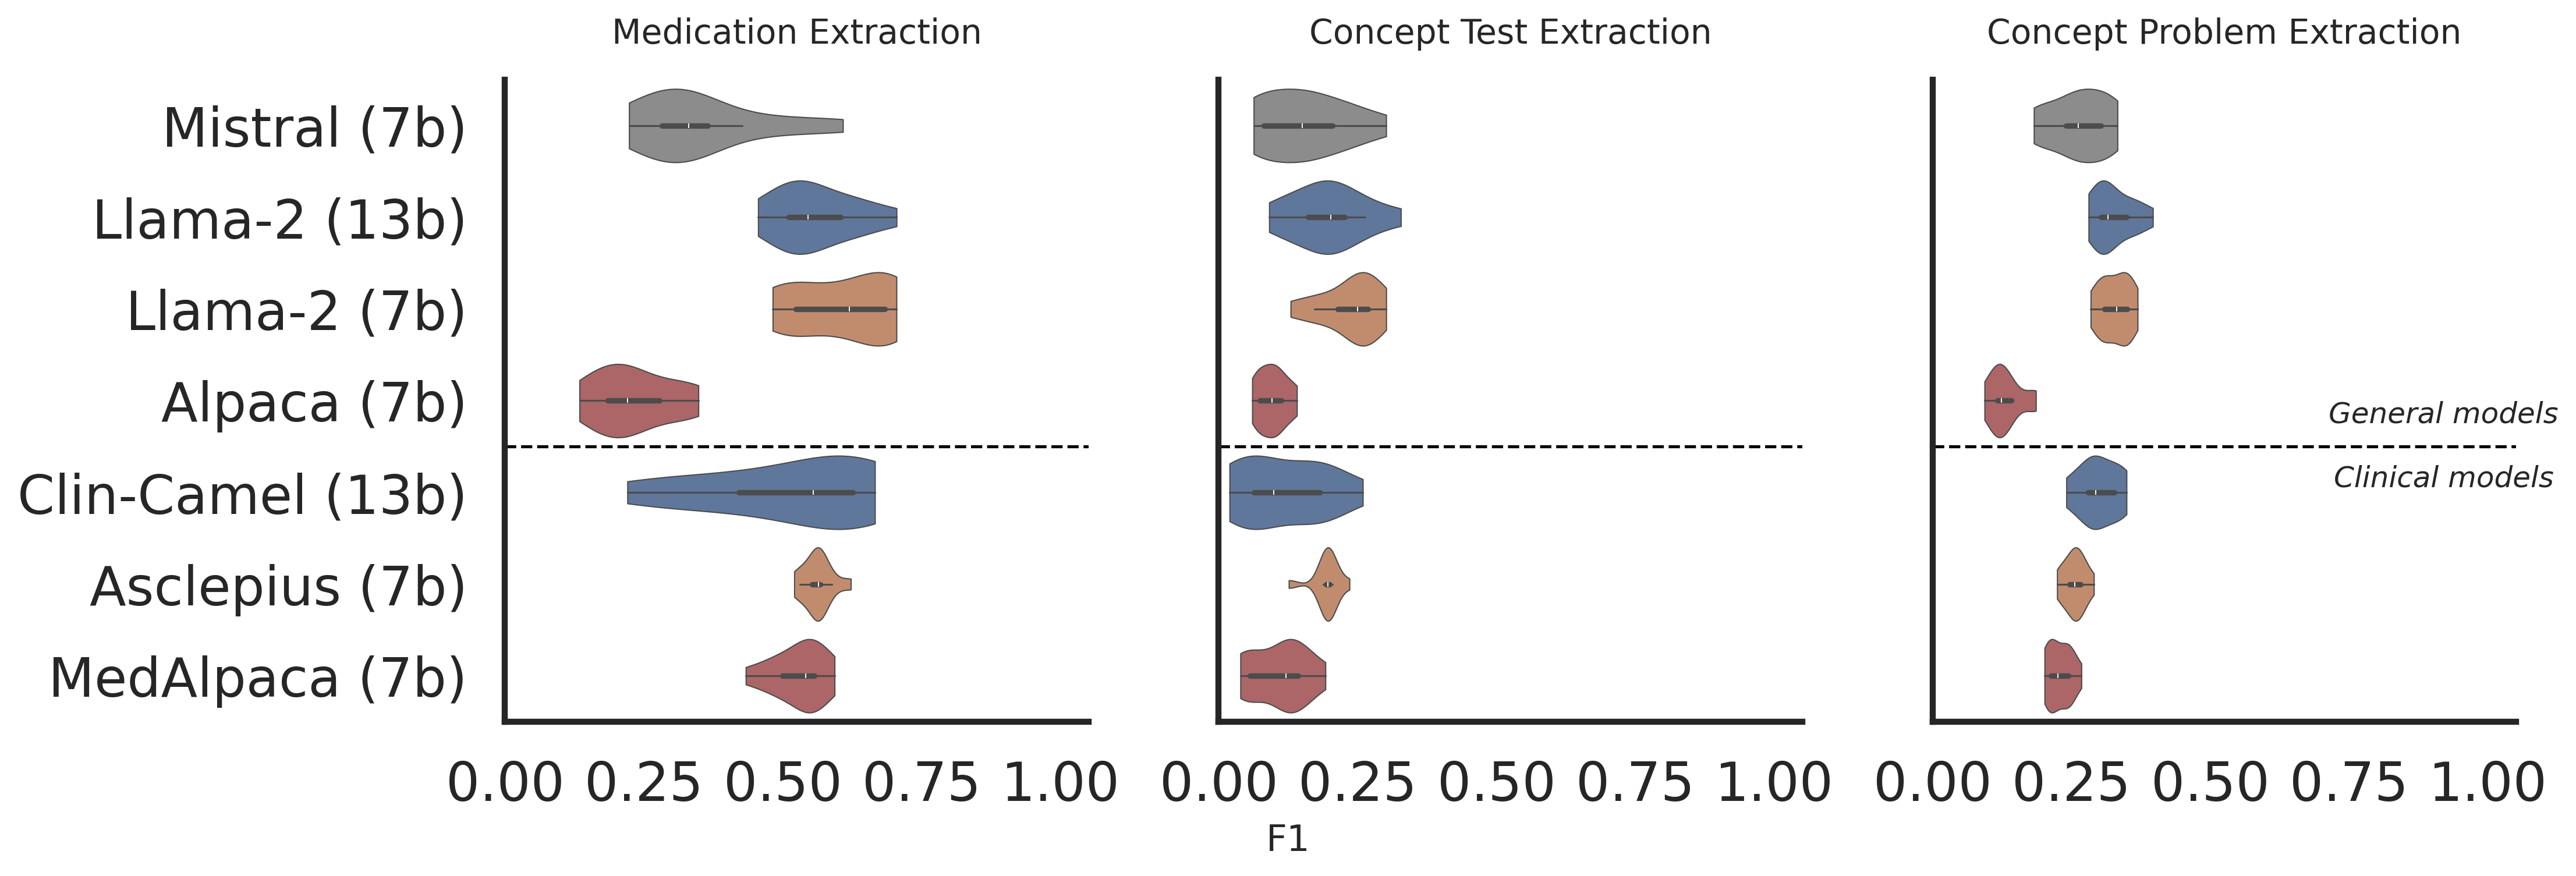

In [16]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 5), dpi=300, sharex=True, sharey=True
)


sns.set_style("white")
sns.set_context("poster")
sns.set_palette("deep", n_colors=12)


plot = "boxplot"
metric = "recall"
for idx, dataset in enumerate(datasets[0:3]):

    df_results_dataset = df_results_grouped[(df_results_grouped["dataset"] == dataset)]
    models = df_results_grouped["y_labels"]
    annotators = df_results_grouped["annotator"]
    correct = df_results_grouped[metric]

    palette = sns.color_palette("crest")
    sns.set_theme(style="white", font_scale=1.25)

    mon = sns.violinplot(
        data=df_results_dataset,
        x="f1_score",
        y="y_labels",
        hue="model",
        palette=COLOR_MAP_LOWER,
        cut=0.0,
        legend=False,
        ax=ax[idx],
        linewidth=0.5,
    )
    mon.set_title(DATASET_MAP[dataset], fontsize=14, pad=15)
    mon.axhline(3.5, color="black", linestyle="--", linewidth=1.25)
    if idx == 2:
        mon.text(
            0.92,
            3.85,
            "Clinical models",
            ha="center",
            va="center",
            style="italic",
            fontsize=12,
        )
        mon.text(
            0.92,
            3.15,
            "General models",
            ha="center",
            va="center",
            style="italic",
            fontsize=12,
        )
    mon.set(ylabel=None)
    mon.set(xlabel=None)
    plt.xlim(0, 1.05)
    plt.tight_layout()

    sns.despine(top=True, right=True, left=False, bottom=False)


fig.text(0.5, 0, "F1", ha="center")
plt.tight_layout()
plt.savefig("extraction1.pdf")

In [18]:
from matplotlib.ticker import FormatStrFormatter


fig = plt.figure(
    constrained_layout=False,
    figsize=(34, 20),
    dpi=300,
)
gs1 = fig.add_gridspec(nrows=2, ncols=6)
ax1 = fig.add_subplot(gs1[0, 0:2])
ax2 = fig.add_subplot(gs1[0, 2:4], sharey=ax1)
ax3 = fig.add_subplot(gs1[0, 4:6], sharey=ax1)


ax = [
    ax1,
    ax2,
    ax3,
]
sns.set_style("white")
sns.set_context("poster")
sns.set_palette("deep", n_colors=12)
sns.set_theme(style="white", font_scale=4)

plot = "boxplot"
metric = "recall"
for idx, dataset in enumerate(datasets[0:3]):

    df_results_dataset = df_results_grouped[(df_results_grouped["dataset"] == dataset)]
    models = df_results_grouped["y_labels"]
    annotators = df_results_grouped["annotator"]
    correct = df_results_grouped[metric]

    # sns.set_theme(style="white", font_scale=3)
    palette = sns.color_palette("crest")
    sns.set_theme(style="white", font_scale=1.5)

    mon = sns.violinplot(
        data=df_results_dataset,
        x="f1_score",
        y="y_labels",
        hue="model",
        palette=COLOR_MAP_LOWER,
        cut=0.0,
        legend=False,
        ax=ax[idx],
    )
    mon.set_title(DATASET_MAP[dataset], fontsize=35, pad=30)

    mon.set(ylabel=None)
    mon.set(xlabel=None)
    if idx not in [0, 3]:
        ax[idx].set_yticklabels([])
    ax[idx].set_xlim(0, 1.01)
    plt.tight_layout()
    sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_theme(style="white", font_scale=3)

fig.text(0.5, 0, "F1", ha="center")
plt.tight_layout()
# plt.savefig("extraction.pdf")